# Wine Quality Prediction(Classification Problem)

### Import Libraries

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [256]:
df=pd.read_csv('redwine.csv')

In [257]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Cleaning

In [258]:
df.duplicated().sum()

240

In [259]:
new_df=df.drop_duplicates(keep='first')


In [260]:
new_df.duplicated().sum()

0

In [261]:
new_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [262]:
new_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Correlation Determination 

In [263]:
#comparing the correction between quality and other composition
correlation=new_df.corr()['quality']

In [264]:
correlation

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

### Representing the Correlation in a heatmap

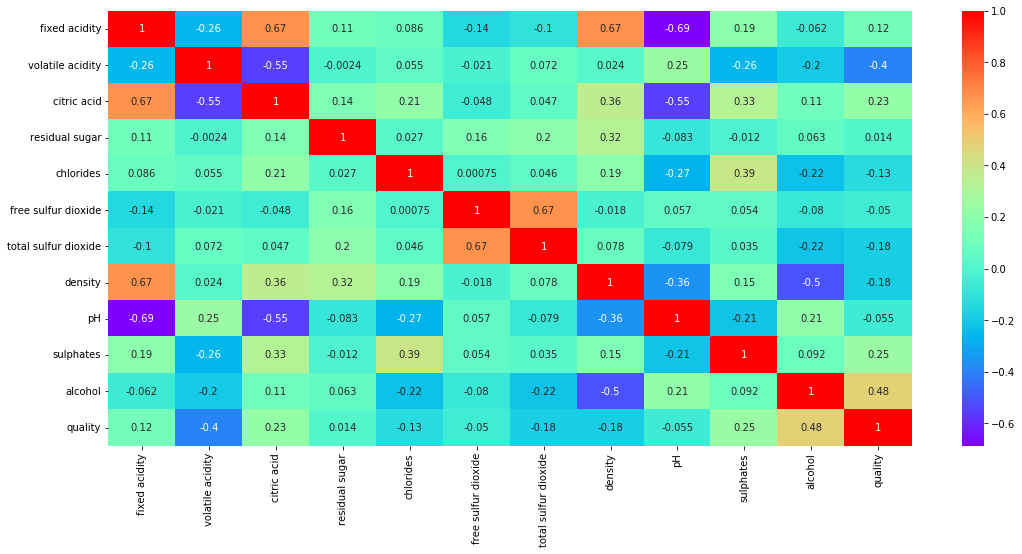

In [265]:
import seaborn as sn
plt.figure(figsize=(18,8))
sn.heatmap(new_df.corr(),annot=True, cmap='rainbow')

### Checking Different Rating Method Available for the Alcohol Quality

In [266]:
rating=new_df['quality'].unique()

In [267]:
rating.sort()
print('Rating in Ascending Order =>',rating)

Rating in Ascending Order => [3 4 5 6 7 8]


In [268]:
x=new_df.iloc[:,0:-1]


In [269]:
x.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


### Splitting the Wine quality into Low & High Quality

In [270]:
new_df['quality'].replace([3,4,5,6],0,inplace=True)
new_df['quality'].replace([7,8],1,inplace=True)

In [271]:
y=new_df['quality']
y=pd.DataFrame(y, columns=['quality'])
y.value_counts()

quality
0          1175
1           184
dtype: int64

### Compare the Balance for both classes

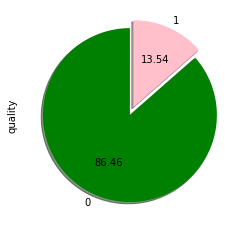

In [272]:
col=['green','pink']
exp=(0,0.1)
new_df['quality'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, colors=col, explode=exp, startangle=90)
plt.show()

### Performing Exploratory Data Analysis

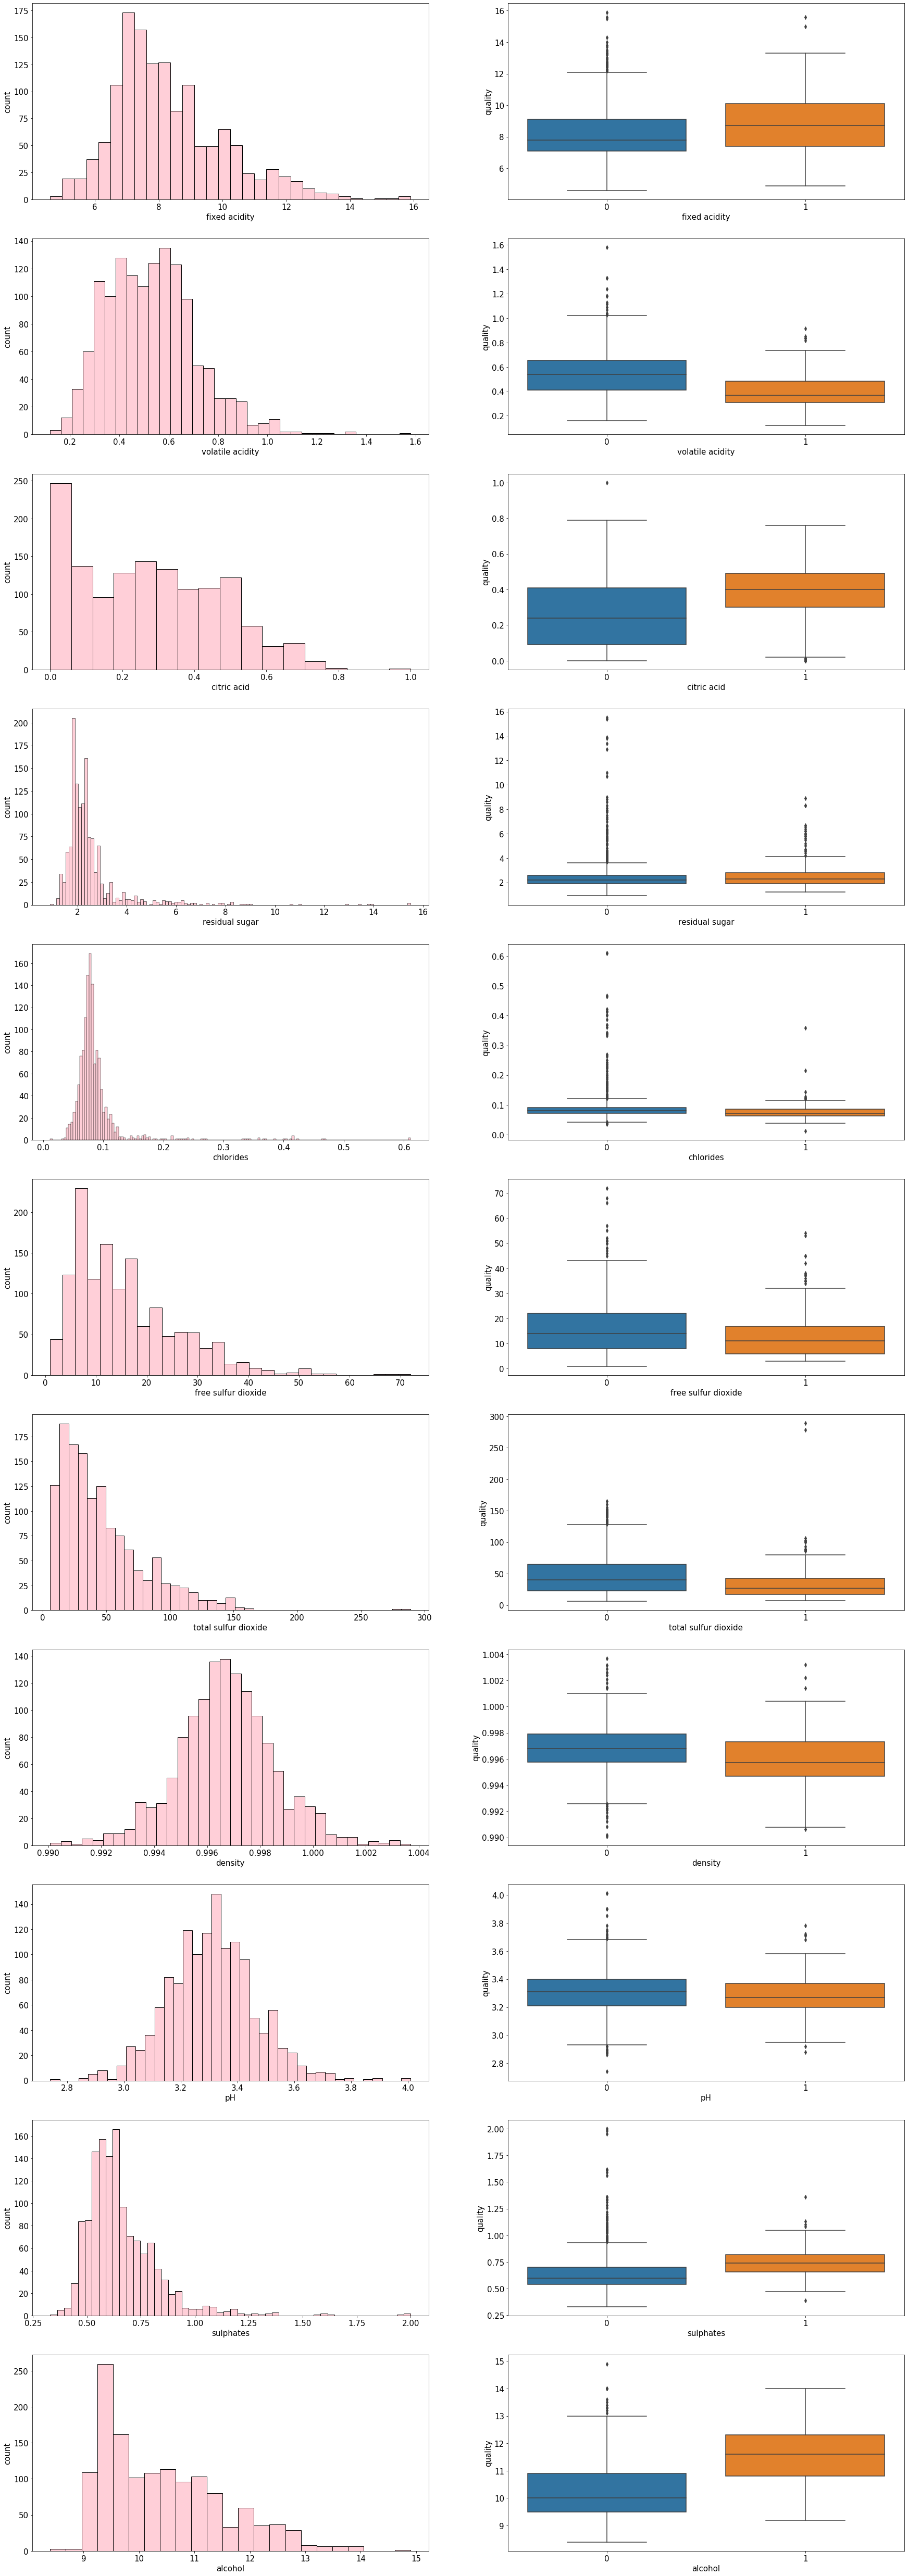

In [273]:
i=1
plt.figure(figsize=(30,90))
for col in x.columns:
    plt.subplot(11,2,i)
    sn.histplot(x[col], color='pink')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)
    i=i+1
    plt.subplot(11,2,i)
    sn.boxplot(y["quality"],x[col])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('quality',fontsize=15)
    i=i+1
plt.show()
    

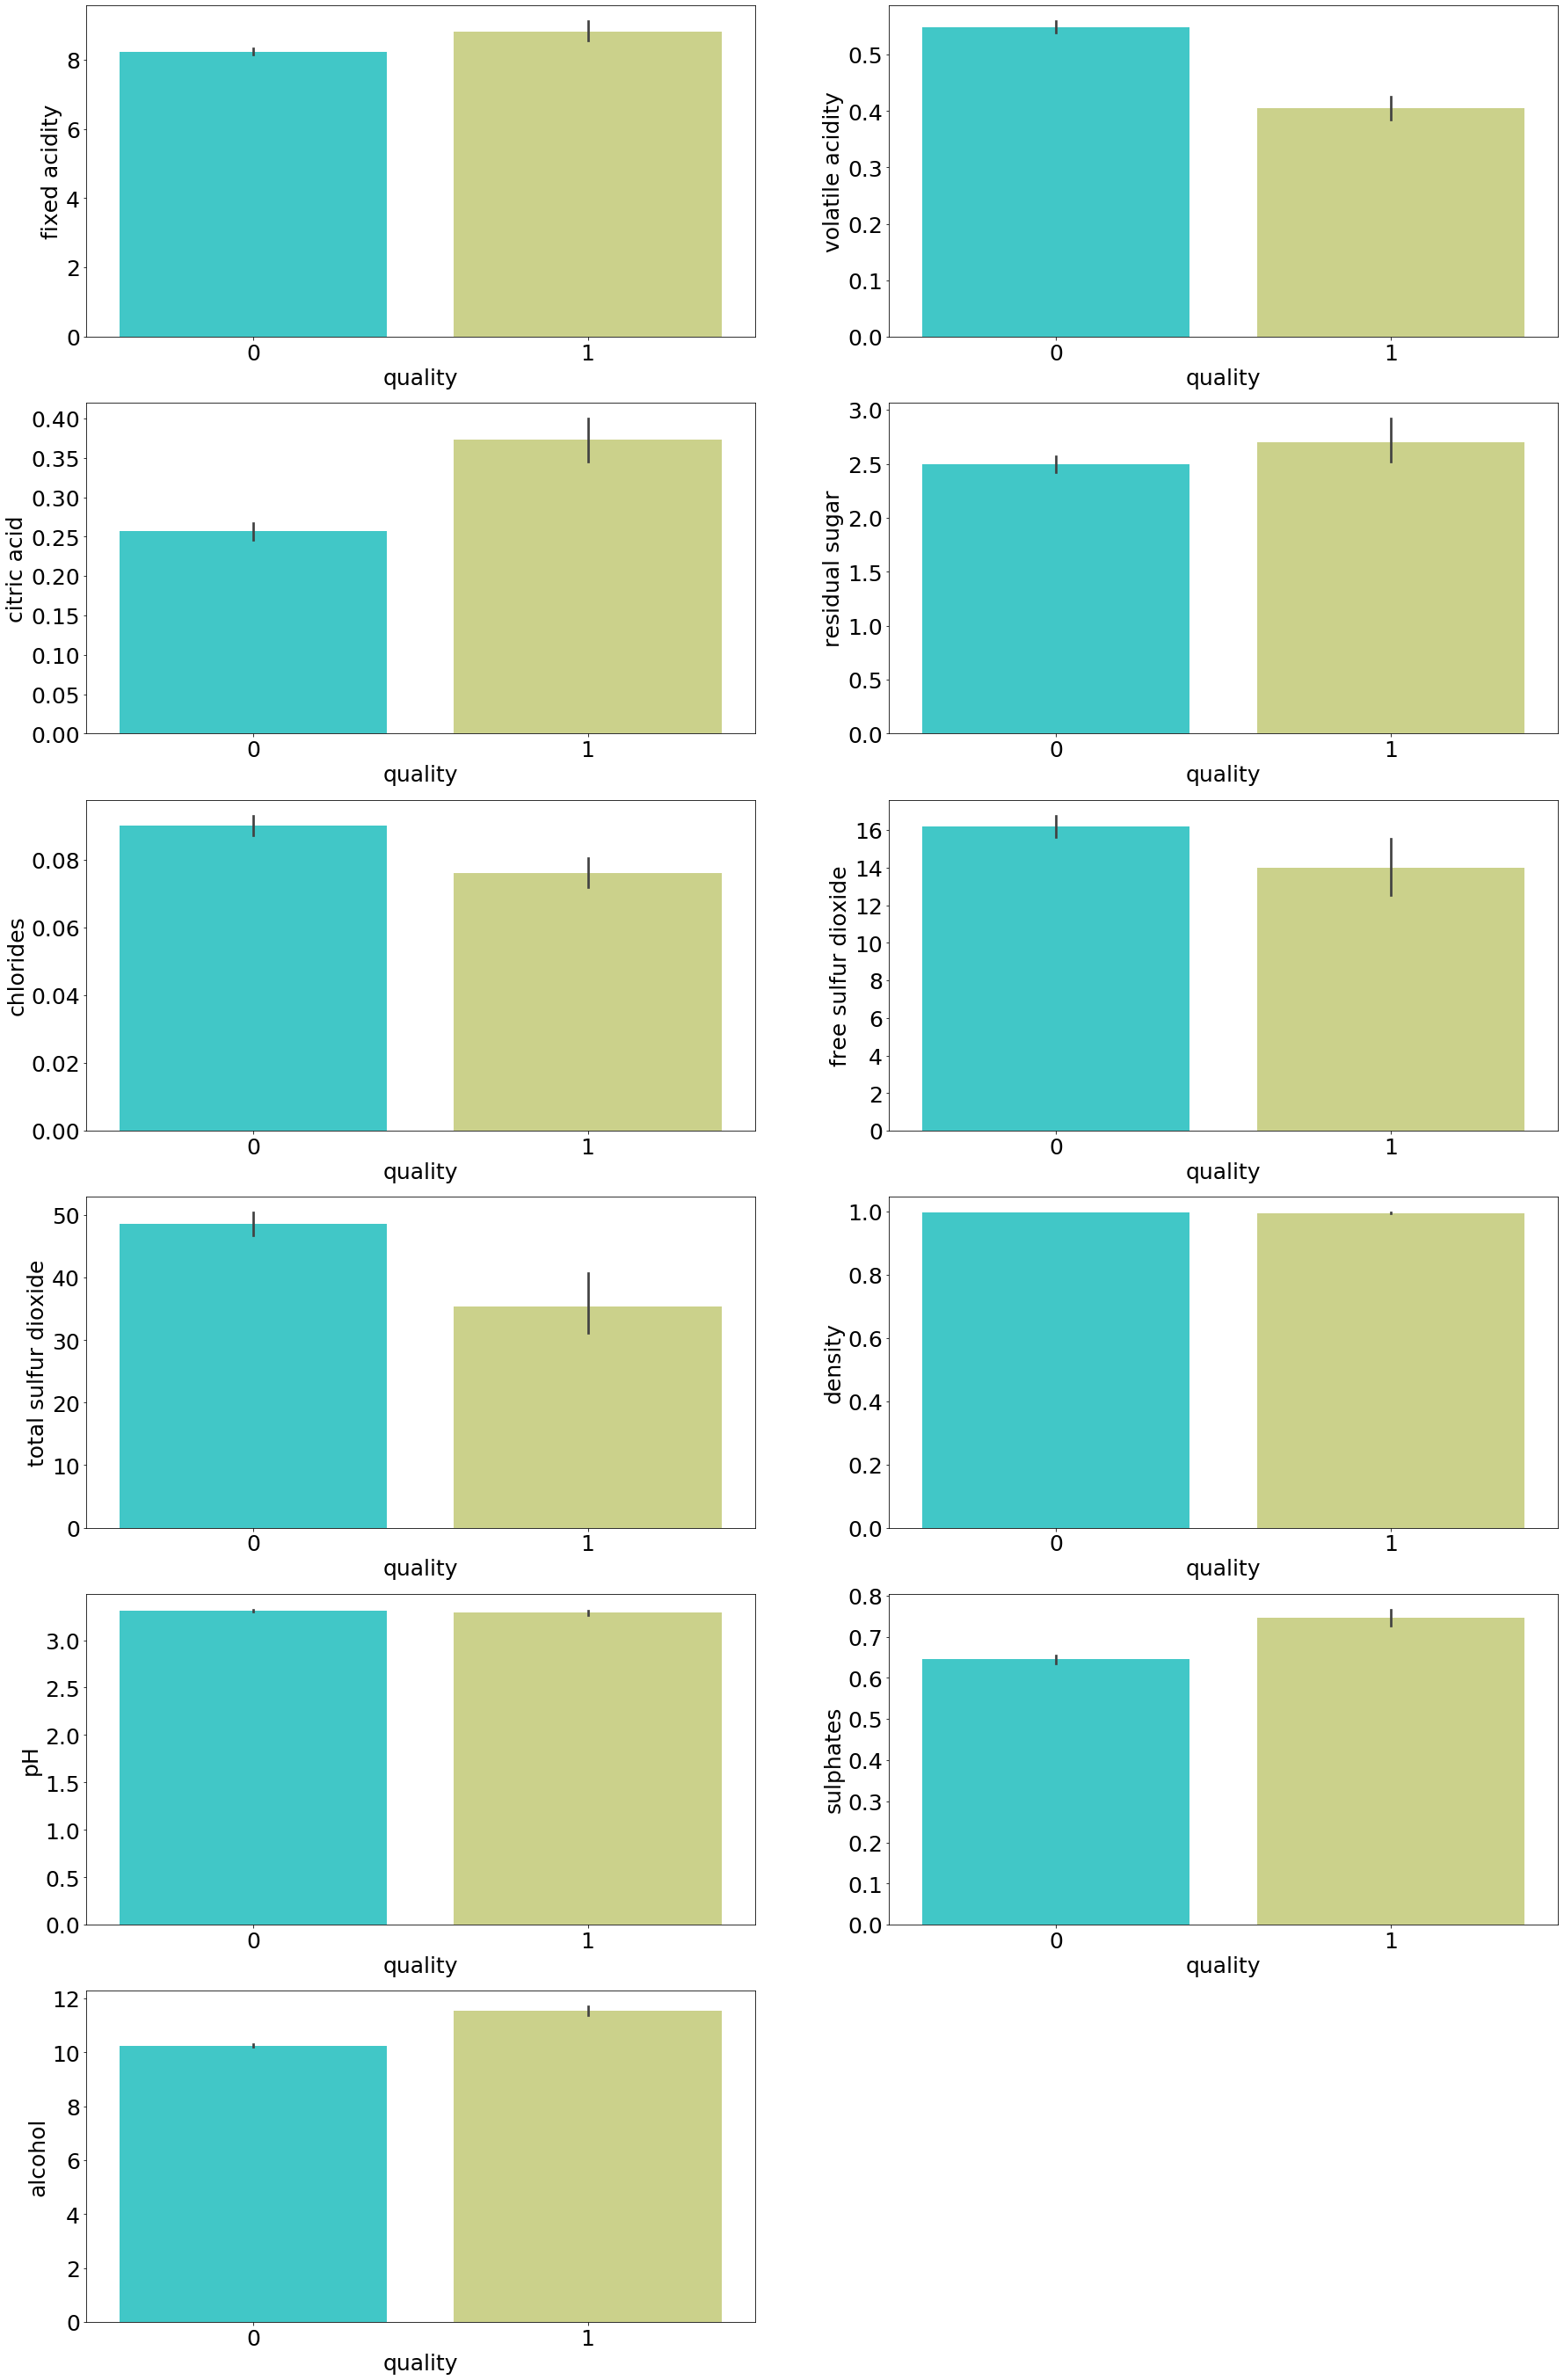

In [274]:
i=1
plt.figure(figsize=(30,90))
for col in x.columns:
    plt.subplot(11,2,i)
    sn.barplot(new_df['quality'], new_df[col], palette='rainbow')
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel('quality', fontsize=25)
    plt.ylabel(col, fontsize=25)
    i=i+1
plt.show()

In [275]:
from imblearn.combine import SMOTEENN
os=SMOTEENN(random_state=42)
x,y=os.fit_resample(x,y)

In [276]:
print(x.shape, y.shape)
print(y.value_counts())
print('duplicate: ',x.duplicated().sum())

(1827, 11) (1827, 1)
quality
1          1036
0           791
dtype: int64
duplicate:  0


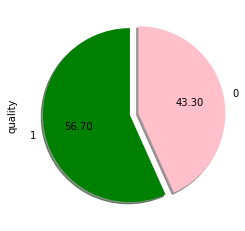

In [277]:
col=['green','pink']
exp=(0,0.1)
y['quality'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, colors=col, explode=exp,startangle=90)
plt.show()

### Splitting the Dataset into the Training Set and Test Set

In [278]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)

### Comparing the columns based on their skew level

In [279]:
def analysis(sk):
    sl=0.75   # skew limt
    sv=sk[x.columns].skew() # skew value
    sc=sv[abs(sv)>sl].sort_values(ascending=False)  # skew column
    i=1
    print('column names: ', sc.index)
    print("\n\n")
    print(sc)
    plt.figure(figsize=(50,90))
    for col in sc.index:
        plt.subplot(8,2,i)
        sn.distplot(x[col], color='g')
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel(col, fontsize=25)
        i=i+1
    plt.show()

column names:  Index(['chlorides', 'residual sugar', 'total sulfur dioxide', 'sulphates',
       'free sulfur dioxide', 'volatile acidity'],
      dtype='object')



chlorides               6.862171
residual sugar          3.459154
total sulfur dioxide    2.009012
sulphates               1.484699
free sulfur dioxide     1.317884
volatile acidity        0.995102
dtype: float64


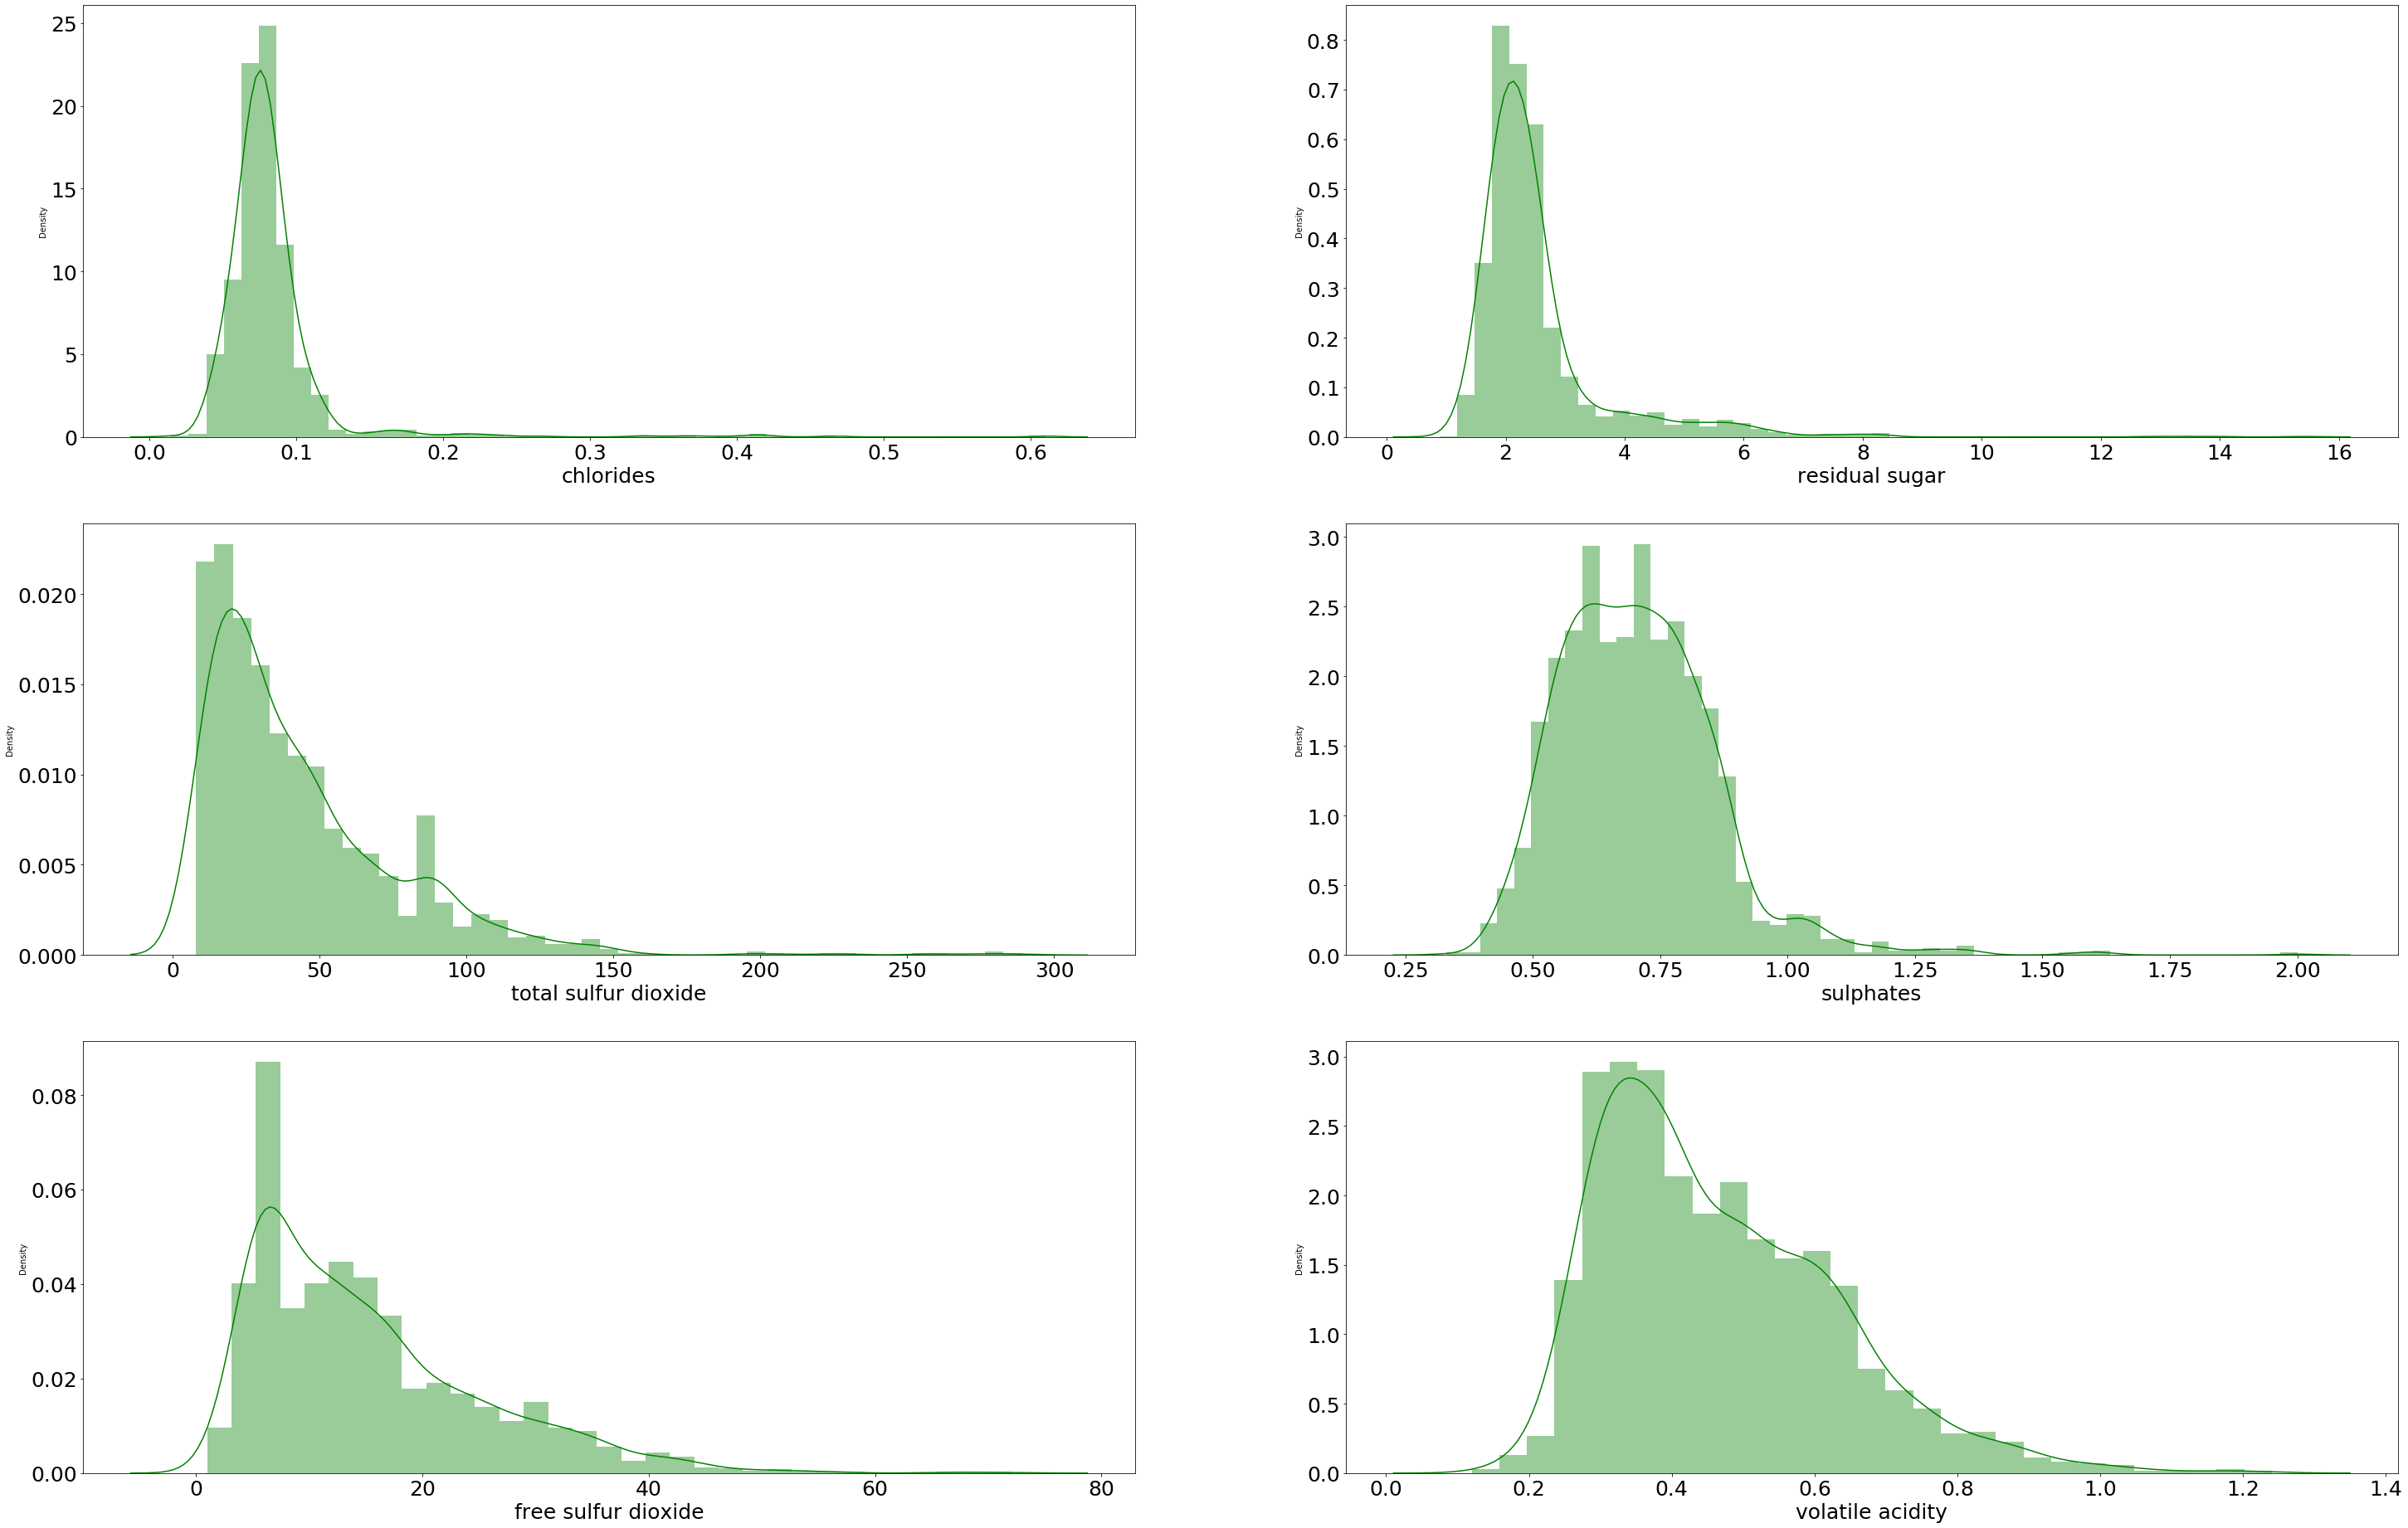

In [280]:
analysis(x_train)

### Fixing skewness using power transformer

In [281]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
sc=['chlorides', 'residual sugar', 'total sulfur dioxide', 'sulphates', 'free sulfur dioxide', 'volatile acidity']
powerT=PowerTransformer(standardize=False)
x_train[sc]=powerT.fit_transform(x_train[sc])
x_test[sc]=powerT.transform(x_test[sc])

In [282]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1401,6.784795,0.220884,0.480856,0.448798,0.030802,3.125437,4.102421,0.992857,3.189229,0.294650,12.538972
768,6.200000,0.257427,0.080000,0.444269,0.038745,2.336463,2.933735,0.996460,3.560000,0.290219,11.600000
1612,8.476399,0.252587,0.183407,0.415907,0.036422,3.233270,3.170442,0.995004,3.395581,0.313286,12.023601
1742,7.514958,0.234101,0.300427,0.420374,0.036227,1.848515,2.252726,0.994945,3.437008,0.306327,11.527779
210,8.000000,0.270112,0.280000,0.435997,0.037380,2.863607,3.749276,0.997300,3.220000,0.270994,9.400000


### Result After Power Transformation

In [283]:
x_train[sc].skew()

chlorides              -0.099717
residual sugar          0.070708
total sulfur dioxide    0.019036
sulphates              -0.010687
free sulfur dioxide     0.007768
volatile acidity        0.059095
dtype: float64

### Feature Scaling

In [284]:
from sklearn.preprocessing import StandardScaler #MinMaxScaler
mms=StandardScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)

### Training  model on the Training set

### NAIVE BAYES MODEL CONFUSION MATRIX AND SCORES

In [285]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(x_train, y_train)

GaussianNB()

### Predicting a New Result

In [286]:
print('\n')
print(' Predicted(Good Quality): ')
print(g.predict(mms.transform([[2, 0.49, 0.03, 1.8, 1.044, 1, 1.5, 1.9908, 3.5, 1.82, 5]])))
print('\n')
print(' Predicted(Bad Quality): ')
print(g.predict(mms.transform([[70.4, 0.70, 0.00, 1.9, 0.076, 11.0, 3.0, 0.9978, 3.51, 90.56, 9.4]])))



 Predicted(Good Quality): 
[1]


 Predicted(Bad Quality): 
[0]


In [287]:
y_pred=g.predict(x_test)

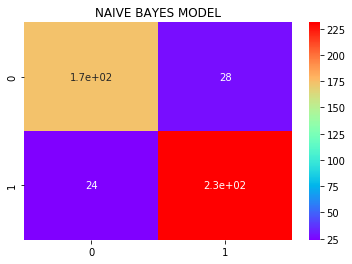

In [288]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
cm=confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, cmap='rainbow')
plt.title('NAIVE BAYES MODEL')
acs = accuracy_score(y_test, y_pred)
pcs=precision_score(y_test, y_pred)
rcs=recall_score(y_test, y_pred)
f1s=f1_score(y_test, y_pred)

In [289]:
print('NAIVE BAYES ALGORITHM')
print(cm)
print('\n\n')
print('Accuracy Score: ',acs)
print('Precision Score: ',pcs)
print('Recall Score: ',rcs)
print('F1 Score: ',f1s)

NAIVE BAYES ALGORITHM
[[174  28]
 [ 24 231]]



Accuracy Score:  0.8862144420131292
Precision Score:  0.8918918918918919
Recall Score:  0.9058823529411765
F1 Score:  0.8988326848249026


### KNN MODEL CONFUSION MATRIX AND SCORES

In [290]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1, metric='minkowski',p=2) # HyperParameter tuning
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicting a New Result

In [291]:
print('\n')
print(' Predicted(Good Quality): ')
print(knn.predict(mms.transform([[2, 80.49, 70.03, 91.8, 1.044, 1, 1.5, 1.9908, 3.5, 1.82, 5]])))
print('\n')
print(' Predicted(Bad Quality): ')
print(knn.predict(mms.transform([[70.4, 0.70, 0.00, 1.9, 0.076, 11.0, 4.0, 0.9978, 3.51, 90.56, 9.4]])))



 Predicted(Good Quality): 
[0]


 Predicted(Bad Quality): 
[0]


In [292]:
y_pred=knn.predict(x_test)

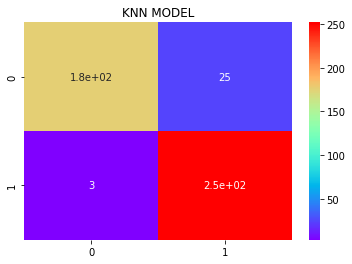

In [293]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
cm=confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,cmap='rainbow')
plt.title('KNN MODEL')
acs = accuracy_score(y_test, y_pred)
pcs=precision_score(y_test, y_pred)
rcs=recall_score(y_test, y_pred)
f1s=f1_score(y_test, y_pred)

In [294]:
print('KNN ALGORITHM')
print(cm)
print('\n\n')
print('Accuracy Score: ',acs)
print('Precision Score: ',pcs)
print('Recall Score: ',rcs)
print('F1 Score: ',f1s)

KNN ALGORITHM
[[177  25]
 [  3 252]]



Accuracy Score:  0.9387308533916849
Precision Score:  0.9097472924187726
Recall Score:  0.9882352941176471
F1 Score:  0.9473684210526316


### SVM MODEL CONFUSION MATRIX AND SCORES

In [295]:
from sklearn.svm import SVC
svm=SVC(gamma=5, kernel='rbf', random_state=42) # HyperParameter tuning
svm.fit(x_train,y_train)

SVC(gamma=5, random_state=42)

### Predicting New Result

In [296]:
print('\n')
print('first prediction(YES): ')
print(svm.predict(mms.transform([[92, 80.49, 70.03, 91.8, 91.044, 99, 98, 88, 93.5, 91.82,95]])))
print('\n')
print('second prediction(NO): ')
print(svm.predict(mms.transform([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])))



first prediction(YES): 
[0]


second prediction(NO): 
[0]


In [297]:
y_pred=svm.predict(x_test)

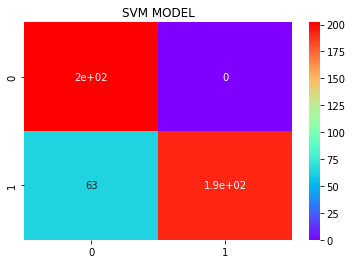

In [298]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
cm=confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, cmap='rainbow')
plt.title('SVM MODEL')
acs = accuracy_score(y_test, y_pred)
pcs=precision_score(y_test, y_pred)
rcs=recall_score(y_test, y_pred)
f1s=f1_score(y_test, y_pred)

In [299]:
print('SVM ALGORITHM')
print(cm)
print('\n\n')
print('Accuracy Score: ',acs)
print('Precision Score: ',pcs)
print('Recall Score: ',rcs)
print('F1 Score: ',f1s)

SVM ALGORITHM
[[202   0]
 [ 63 192]]



Accuracy Score:  0.862144420131291
Precision Score:  1.0
Recall Score:  0.7529411764705882
F1 Score:  0.8590604026845637
